In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
file_path = "house price data.csv"
data = pd.read_csv(file_path)
data.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
date             4600 non-null object
price            4600 non-null float64
bedrooms         4600 non-null float64
bathrooms        4600 non-null float64
sqft_living      4600 non-null int64
sqft_lot         4600 non-null int64
floors           4600 non-null float64
waterfront       4600 non-null int64
view             4600 non-null int64
condition        4600 non-null int64
sqft_above       4600 non-null int64
sqft_basement    4600 non-null int64
yr_built         4600 non-null int64
yr_renovated     4600 non-null int64
street           4600 non-null object
city             4600 non-null object
statezip         4600 non-null object
country          4600 non-null object
dtypes: float64(4), int64(9), object(5)
memory usage: 647.0+ KB


In [8]:
data.describe

<bound method NDFrame.describe of                      date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view 

## CONVERT THE DATE TO DATETIME

In [9]:

data['date'] = pd.to_datetime(data['date'])


## DROP THE CLOUMNS THAT ARE NOT USEFUL FOR LINEAR REGRESSION

In [10]:
data = data.drop(['date','street','statezip','country'],axis=1)

In [11]:
data.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond


## HANDLE THE CATEGORICAL DATA USE ONE HOT ENCODING ON 'CITY' COLUMN OF THE DATASET

In [12]:
from sklearn.preprocessing import OneHotEncoder
ht = OneHotEncoder(drop= 'first', sparse=False)

encoded_cities = ht.fit_transform(data[['city']])

encoded_cities_df = pd.DataFrame(encoded_cities,columns=ht.get_feature_names(['city']))

data = data.drop('city', axis=1)
data = pd.concat([data,encoded_cities_df], axis=1)

data.head(10)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## SPLIT THE DATASET FOR TRAINING AND TESTING

In [13]:
X = data.iloc[:, 1:]
y = data['price']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.2, random_state=1)


## CREATE A MODEL TO PREDICT

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

In [16]:
print(f"COEFFICIENT: {regressor.coef_}")
print(f"INTERCEPT: {regressor.intercept_}")

COEFFICIENT: [-2.25951364e+04  1.75135033e+04  1.31569913e+02 -2.83578409e-01
  5.14894230e+03 -4.51657113e+04  3.00024090e+04  2.83602924e+04
  1.21800300e+02  9.77132071e+00 -9.37397072e+02 -1.40326502e+00
 -2.12242200e+04 -1.22236088e-09  3.37977721e+05  3.94024725e+05
  5.64523171e+04  3.99274123e+04  2.04797139e+05  1.60071068e-09
 -2.76067883e+04 -4.96257366e+04  8.96876653e+03 -7.92545758e+04
  5.82076609e-10 -5.80748893e+04 -2.32830644e-10  1.67630800e+05
  7.29079950e+04 -4.55234908e+04  2.06695677e+05  3.88179941e+04
 -1.74819542e+04  1.08786836e+06  3.91600142e+05 -4.80213203e-10
  8.95534505e+04  7.47565879e+04  3.33668404e+04  7.95635502e+04
  1.16415322e-10 -1.45519152e-11  2.06546976e+05  1.93015242e+04
  1.46228427e+05 -9.10539063e+04  2.41715875e+05  1.11149146e+05
 -3.89963954e+04  3.99033328e+04  0.00000000e+00 -4.35281362e+04
  1.22845793e+05  1.48212630e+05 -4.66348712e+05]
INTERCEPT: 1654140.647083392


## ACCURACY OF TH MODEL

In [38]:
from sklearn.metrics import mean_squared_error, r2_score


mse_train = mean_squared_error(y_train,y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)


mse_test = mean_squared_error(y_test,y_pred_test)
rmse_test = np.sqrt(mse_train)
r2_test = r2_score(y_test, y_pred_test)

print(f'Training MSE: {mse_train}')
print(f'Training RMSE: {rmse_train}')
print(f'Training R2: {r2_train}')

print(f'\nTesting MSE: {mse_test}')
print(f'Testing RMSE: {rmse_test}')
print(f'Testing R2: {r2_test}')



Training MSE: 40676142791.45793
Training RMSE: 201683.27345483543
Training R2: 0.6341728786631361

Testing MSE: 289909299427.92316
Testing RMSE: 201683.27345483543
Testing R2: 0.2151026681754339


## VISUALIZE THE RESULT

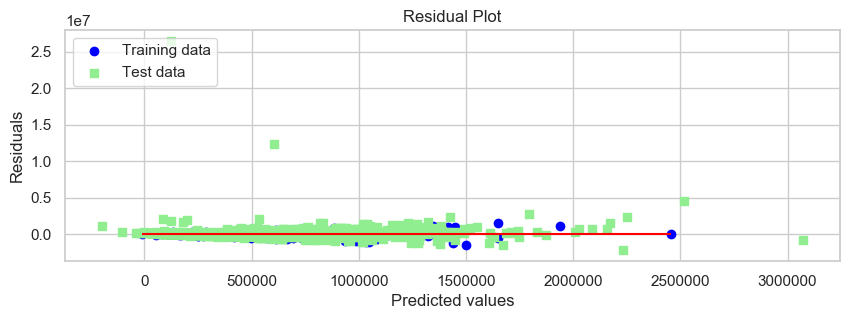

In [32]:
plt.figure(figsize=(10, 3))
plt.scatter(y_pred_train, y_train - y_pred_train, c='blue', marker='o', label='Training data')
plt.scatter(y_pred_test, y_test - y_pred_test, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=min(y_pred_train), xmax=max(y_pred_train), color='red')
plt.title('Residual Plot')
plt.show()

In [40]:
def preprocess_and_predict(input_data):
    # Convert user input into DataFrame
    df = pd.DataFrame([input_data])

    # Handle OneHotEncoding for the city column
    encoded_city = ht.transform(df[['city']])
    encoded_city_df = pd.DataFrame(encoded_city, columns=ht.get_feature_names(['city']))

    # Drop the original city column and concatenate the new encoded columns
    df = df.drop('city', axis=1)
    df = pd.concat([df, encoded_city_df], axis=1)

    # Ensure all columns are in the same order as the training data
    df = df[X.columns]

    # Predict using the model
    prediction = regressor.predict(df)
    return prediction

# Example user input data
user_input = {
    'bedrooms': 3,
    'bathrooms': 2,
    'sqft_living': 2000,
    'sqft_lot': 5000,
    'floors': 1.5,
    'waterfront': 0,
    'view': 2,
    'condition': 3,
    'sqft_above': 1800,
    'sqft_basement': 200,
    'yr_built': 1990,
    'yr_renovated': 2005,
    'city': 'Kent'
}

# Predict the price based on user input
prediction = preprocess_and_predict(user_input)
print(f"Predicted Price: {prediction[0]}")

Predicted Price: 343350.88048881246
